<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/slump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=1c3a28fa414c3414bb66580771eb9cc98efdc4b4dd43035d1f7e167c1e4d99e5
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-slump.csv to csv_result-slump.csv


In [3]:
import pandas as pd
df = pd.read_csv("csv_result-slump.csv")
df.head()
y_col = [
'SLUMP_cm',
'FLOW_cm',
'Compressive_Strength_Mpa'

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,SLUMP_cm,FLOW_cm,Compressive_Strength_Mpa
0,23.0,62.0,34.99
1,0.0,20.0,41.14
2,1.0,20.0,41.81
3,3.0,21.5,42.08
4,20.0,64.0,26.82


In [ ]:
X

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
# Initialize the scaler
scaler = StandardScaler()

robust_scaler_X = RobustScaler()
X_train_scaled = robust_scaler_X.fit_transform(X_train)
X_test_scaled = robust_scaler_X.transform(X_test)
# Apply robust scaling to the target features (y)
robust_scaler_y = RobustScaler()

from sklearn.preprocessing import QuantileTransformer

X_train = X_train_scaled
X_test = X_test_scaled



In [9]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor

rfg = MultiOutputRegressor(TPOTRegressor(generations=1, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10))

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)




Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -53.62435621045857

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=12, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -167.52143431665928

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.3, min_samples_leaf=2, min_samples_split=14, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.798500852940668

Best pipeline: LassoLarsCV(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=11, min_samples_split=19, n_estimators=100), normalize=False)


0.5642002026198207

In [10]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_mse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)
morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse1 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse1)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 7.725955738979999
MAE for morrfr is 5.171598965006114
mean_test_values: SLUMP_cm                    18.833333
FLOW_cm                     53.809524
Compressive_Strength_Mpa    33.925238
dtype: float64
RMSE: 7.725955738979999
Relative RMSE: SLUMP_cm                    0.410228
FLOW_cm                     0.143580
Compressive_Strength_Mpa    0.227735
dtype: float64
arrmse: 0.2605140667974495
Percentage arrmse = 26.05%
rmse_per_output: [ 5.744194   11.78318008  2.68925245]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


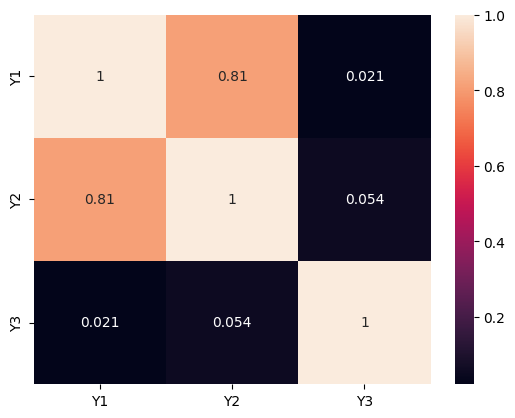

In [8]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2]).fit(X_train, y_train)
#chain.fit(X_train, y_train)
y_pred2 = chain.predict(X_test)
chain.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.3979633175936265

In [12]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse2=math.sqrt(morrfr_mse(y_test, y_pred2))
print('RMSE for morrfr is',morrfr_rmse2)
morrfr_mae2=morrfr_mae(y_test, y_pred2)
print('MAE for morrfr is',morrfr_mae2)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse2 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse2)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 7.758353662594786
MAE for morrfr is 5.942715947219633
mean_test_values: SLUMP_cm                    18.833333
FLOW_cm                     53.809524
Compressive_Strength_Mpa    33.925238
dtype: float64
RMSE: 7.758353662594786
Relative RMSE: SLUMP_cm                    0.411948
FLOW_cm                     0.144182
Compressive_Strength_Mpa    0.228690
dtype: float64
arrmse: 0.2616065031408391
Percentage arrmse = 26.16%
rmse_per_output: [ 5.95863492 10.7880506   5.35619164]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


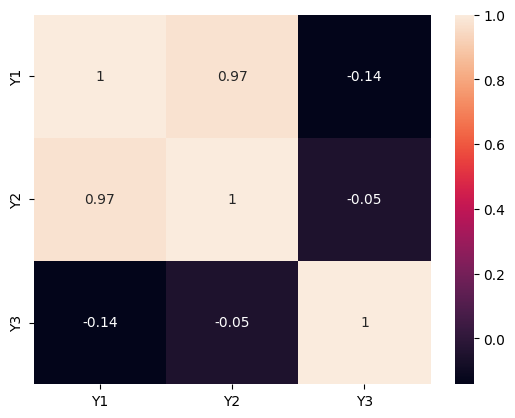

In [13]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [5]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=1, population_size=5,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [6]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(10).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -61.518374817961536

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=3, min_samples_split=2, n_estimators=100)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -35.47875064447359

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.8, tol=0.01)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.1547180506620025

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.8, tol=0.01)


In [7]:
Ypred2 = reg2.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.5439717260261879


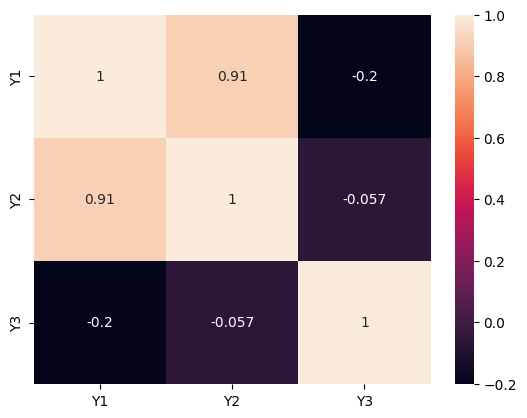

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
rmse = sqrt(mean_squared_error(y_test, Ypred2))
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = rmse / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("RMSE:", rmse)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")

import numpy as np
def calculate_rrmse(y_test, Ypred2):
# Calculate RMSE
  rmse = np.sqrt(((y_test - Ypred2) ** 2).mean())
# Calculate the range of the data
  data_range = np.max(y_test) - np.min(y_test)

RMSE: 8.106770162617998
Relative RMSE: SLUMP_cm                    0.430448
FLOW_cm                     0.150657
Compressive_Strength_Mpa    0.238960
dtype: float64
arrmse: 0.2733548747892074
Percentage arrmse = 27.34%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
